In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
di = np.random.uniform(0,5, 20)

In [100]:
def signal_model(x, a, b):
    return a*np.exp(b*x)

In [101]:
def c0_k(mu, x, k):
    return (((((k*x)-mu)**k)*np.exp(-k*x))/(np.math.factorial(k)))*(1+(k/(mu-(k*x))))

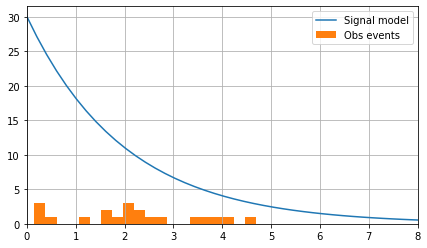

In [312]:
c1, c2 = 30, -0.5

plt.figure(figsize=(7,4))
x = np.linspace(0, 20, 100)
plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
histvalue, xbins, _ = plt.hist(di, bins = 20, label = 'Obs events')
binscenter=(xbins[:-1]+xbins[1:])*0.5
plt.xlim(0,8); plt.legend(); plt.grid()
plt.show()

## Maximum gap method

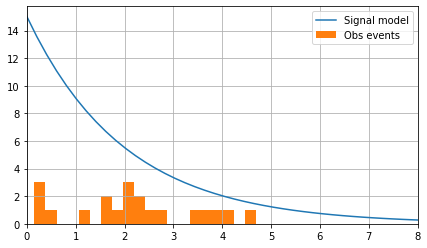

maximum area  4.517790286785535 is between 0.606360294250188 and 1.0603015794155888


In [314]:
c1, c2 = 15, -0.5
plt.figure(figsize=(7,4))
x = np.linspace(0, 20, 100)
plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
histvalue, xbins, _ = plt.hist(di, bins = 20, label = 'Obs events')
binscenter=(xbins[:-1]+xbins[1:])*0.5
plt.xlim(0,8); plt.legend(); plt.grid()
plt.show()

i, maxgaps = 0, []
for b in range(20):
    if i < 20 and histvalue[i] ==0:
        for n in range(5):
            if histvalue[i+n] !=0: 
                gaparea = np.trapz([signal_model(xbins[i], c1, c2 ), signal_model(xbins[i+n], c1, c2 )], [xbins[i], xbins[i+n]])
                maxgaps.append((i, i+n , gaparea))
                i+=n; 
                break
    else:
        i+=1
maxgaps.append((xbins[-1], 8, np.trapz([signal_model(xbins[-1], c1, c2 ), signal_model(8, c1, c2 )], [xbins[-1], 8])))
maxarray = np.asarray(maxgaps)
maxvalues = maxarray[:][np.argmax(maxarray[:,2])]
print('maximum area ', maxvalues[2], 'is between', xbins[int(maxvalues[0])], 'and', xbins[int(maxvalues[1])])

In [315]:
mu = 0
for b in range(20):
    mu+=np.trapz([signal_model(xbins[b], c1, c2 ), signal_model(xbins[b+1],c1, c2 )], [xbins[b], xbins[b+1]])
print('mu is', mu)
print('m is ', mu/maxvalues[2])
print('x is', maxvalues[2])
c0 = 0
for k in range(0, int(mu/maxvalues[2])+1):
    c0 +=c0_k(mu=mu, x = maxvalues[2], k=k)
print('C0', c0)

mu is 24.952623840179974
m is  5.52319214841955
x is 4.517790286785535
C0 0.7826583268983128


### Finding optimum signal model / sigma and $C_0$ using maximum gap method

For constant c1 17.789473684210527  c2  -0.5
C0 is 0.8854481142880662
expected events / area under blue curve:  29.592936343792392


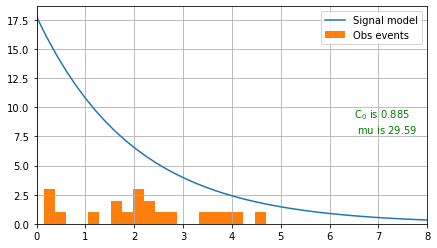

-------------------------------------
For constant c1 19.315789473684212  c2  -0.7368421052631584
C0 is 0.8531140840137643
expected events / area under blue curve:  22.65588696621141


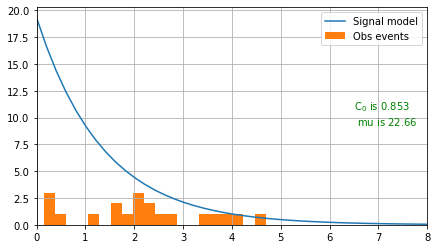

-------------------------------------
For constant c1 19.315789473684212  c2  -0.5
C0 is 0.9207741125547912
expected events / area under blue curve:  32.13197526086333


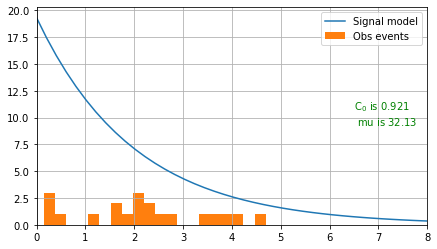

-------------------------------------
For constant c1 20.842105263157897  c2  -0.7368421052631584
C0 is 0.890809445213762
expected events / area under blue curve:  24.44613416517634


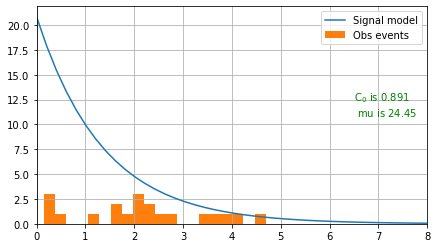

-------------------------------------
For constant c1 20.842105263157897  c2  -0.5
C0 is 0.9457235272209978
expected events / area under blue curve:  34.67101417793429


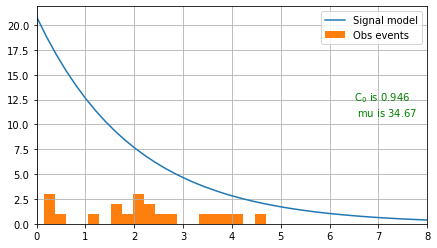

-------------------------------------
For constant c1 22.36842105263158  c2  -0.7368421052631584
C0 is 0.9194661219808008
expected events / area under blue curve:  26.236381364141277


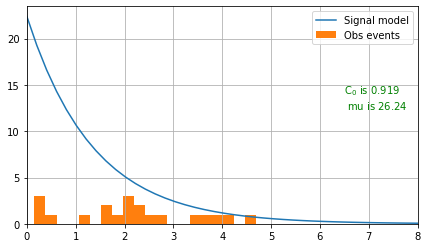

-------------------------------------
For constant c1 23.894736842105264  c2  -0.9736842105263159
C0 is 0.8813444000401394
expected events / area under blue curve:  20.986285327388106


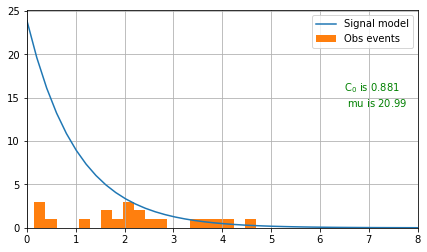

-------------------------------------
For constant c1 23.894736842105264  c2  -0.7368421052631584
C0 is 0.9409863159212869
expected events / area under blue curve:  28.026628563106204


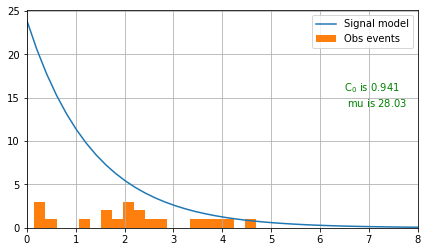

-------------------------------------
For constant c1 25.42105263157895  c2  -0.9736842105263159
C0 is 0.9075746938863565
expected events / area under blue curve:  22.32681897164858


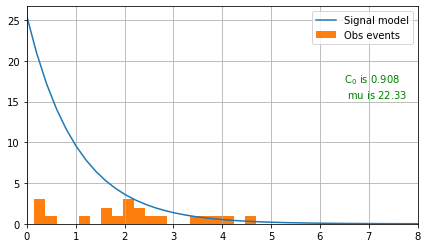

-------------------------------------
For constant c1 26.947368421052634  c2  -1.210526315789474
C0 is 0.8594575024413711
expected events / area under blue curve:  18.55002343475477


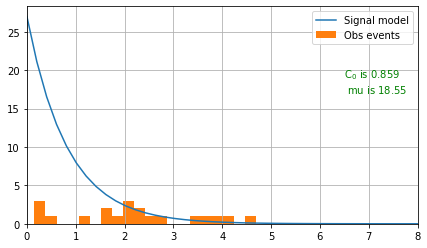

-------------------------------------
For constant c1 26.947368421052634  c2  -0.9736842105263159
C0 is 0.9283521611473757
expected events / area under blue curve:  23.66735261590906


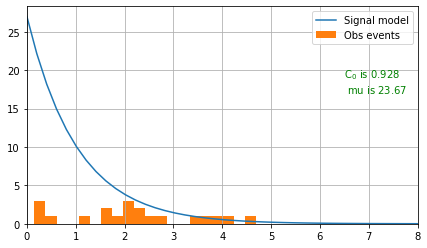

-------------------------------------
For constant c1 28.47368421052632  c2  -1.210526315789474
C0 is 0.8853974926591397
expected events / area under blue curve:  19.60070835586393


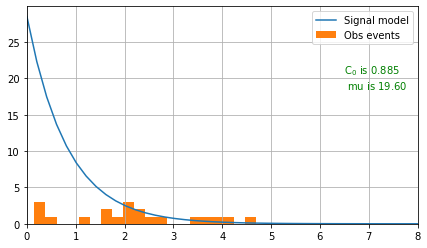

-------------------------------------
For constant c1 28.47368421052632  c2  -0.9736842105263159
C0 is 0.9446879932026333
expected events / area under blue curve:  25.00788626016953


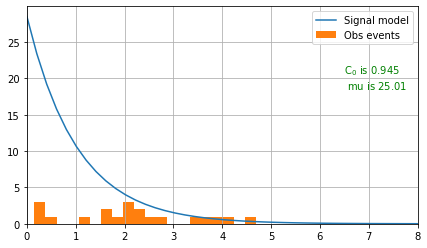

-------------------------------------
For constant c1 30.0  c2  -1.210526315789474
C0 is 0.9069025406579561
expected events / area under blue curve:  20.651393276973085


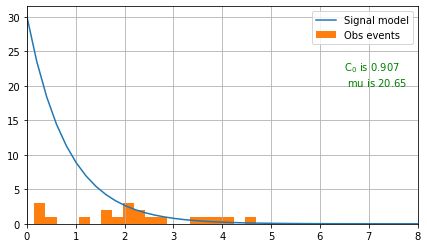

-------------------------------------


In [373]:
c1_all, c2_all, mu_all, c0_all = [], [], [], []
for c1 in np.linspace(1,30,20):
    for c2 in np.linspace(-5,-0.5,20):
        i, maxgaps = 0, []
        for b in range(20):
            if i < 20 and histvalue[i] ==0:
                for n in range(5):
                    if histvalue[i+n] !=0: 
                        gaparea = np.trapz([signal_model(xbins[i], c1, c2 ), signal_model(xbins[i+n], c1, c2 )], [xbins[i], xbins[i+n]])
                        maxgaps.append((i, i+n , gaparea))
                        i+=n; 
                        break
            else:
                i+=1
        maxgaps.append((xbins[-1], 8, np.trapz([signal_model(xbins[-1], c1, c2 ), signal_model(8, c1, c2 )], [xbins[-1], 8])))
        maxarray = np.asarray(maxgaps)
        maxvalues = maxarray[:][np.argmax(maxarray[:,2])]

        mu = 0
        for b in range(20):
            mu+=np.trapz([signal_model(xbins[b], c1, c2 ), signal_model(xbins[b+1],c1, c2 )], [xbins[b], xbins[b+1]])

        c0 = 0
        for k in range(0, int(mu/maxvalues[2])+1):
            c0 +=c0_k(mu=mu, x = maxvalues[2], k=k)
        c1_all.append(c1); c2_all.append(c2); mu_all.append(mu); c0_all.append(c0)
        if c0 > 0.85 and c0 < 0.95:
            print('For constant c1', c1, ' c2 ', c2)
            print('C0 is', c0)
            print('expected events / area under blue curve: ', mu)
            plt.figure(figsize=(7,4))
            x = np.linspace(0, 20, 100)
            plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
            plt.hist(di, bins = 20, label = 'Obs events')
            plt.text(6.5,c1-10,'$\mathregular{C_0}$ is %.3f \n $\mathregular{mu}$ is %.2f'%(c0, mu), color ='green')
            plt.xlim(0,8); plt.legend(); plt.grid()
            plt.show()
            print('-------------------------------------')

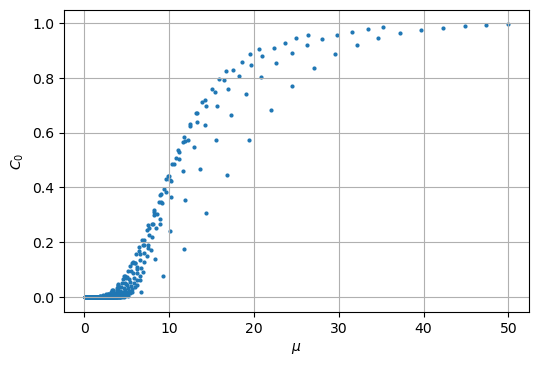

In [374]:
plt.figure(dpi=100)
plt.scatter(mu_all, c0_all, s=4)
plt.xlabel('$\mu$');plt.ylabel('$C_0$');plt.grid(); plt.show()

In [376]:
print('\tmu\t\t\tc1\t\t  c2')
for n in np.where(np.array(mu_all)>20)[0]:
    print(mu_all[n],'\t', c1_all[n],'\t', c2_all[n])

	mu			c1		  c2
21.975819592579565 	 13.210526315789474 	 -0.5
24.514858509650505 	 14.73684210526316 	 -0.5
27.053897426721438 	 16.263157894736842 	 -0.5
20.865639767246467 	 17.789473684210527 	 -0.7368421052631584
29.592936343792392 	 17.789473684210527 	 -0.5
22.65588696621141 	 19.315789473684212 	 -0.7368421052631584
32.13197526086333 	 19.315789473684212 	 -0.5
24.44613416517634 	 20.842105263157897 	 -0.7368421052631584
34.67101417793429 	 20.842105263157897 	 -0.5
26.236381364141277 	 22.36842105263158 	 -0.7368421052631584
37.21005309500523 	 22.36842105263158 	 -0.5
20.986285327388106 	 23.894736842105264 	 -0.9736842105263159
28.026628563106204 	 23.894736842105264 	 -0.7368421052631584
39.74909201207617 	 23.894736842105264 	 -0.5
22.32681897164858 	 25.42105263157895 	 -0.9736842105263159
29.816875762071138 	 25.42105263157895 	 -0.7368421052631584
42.288130929147115 	 25.42105263157895 	 -0.5
23.66735261590906 	 26.947368421052634 	 -0.9736842105263159
31.607122961036072

## Optimum Interval method

#### Method 1

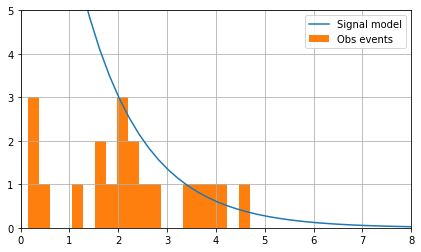

maximum area  7.353672814196805 is between 0.15241900908478712 and 0.37938965166748756


In [324]:
c1, c2 = 15, -0.8
plt.figure(figsize=(7,4))
plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
plt.hist(di, bins = 20, label = 'Obs events')
# plt.scatter(binscenter,value, s=10, color ='black',label ='values')
plt.xlim(0,8); plt.ylim(0,5);plt.legend();plt.grid()
# for i in range(20):
#     plt.text(xbins[i]+0.05 , histvalue[i] + 0.2, str(i), fontsize=10)#, ha='center')
plt.show()

n = 3

maxgaps = []
for b in range(len(histvalue)):
    if histvalue[b] == n:
        startbin = b; endbin = b+1; startx = xbins[b]; endx = xbins[b+1]
#         print('startbin ', startbin,'endbin ', endbin, ', xvalue of start bin ', startx, ', xvalue of end bin ', endx)
        gaparea = np.trapz([signal_model(startx, c1, c2 ), signal_model(endx, c1, c2 )], [startx, endx])
#         print('x_i = ', gaparea)
        maxgaps.append((startx, endx , gaparea))
    for m in np.arange(1,5):
        if b+m < 20:
            if np.sum([histvalue[b+i] for i in range(m+1)]) < n:
                continue
            elif np.sum([histvalue[b+i] for i in range(m+1)]) == n:
                startbin = b; endbin = b+m+1; startx = xbins[b]; endx = xbins[b+m+1]
#                 print('startbin ', startbin,'endbin ', endbin, ', xvalue of start bin ', startx, ', xvalue of end bin ', endx)
                gaparea = np.trapz([signal_model(startx, c1, c2 ), signal_model(endx, c1, c2 )], [startx, endx])
#                 print('x_i = ', gaparea)
                maxgaps.append((startx, endx , gaparea))
                continue
            else:
                break
maxarray = np.asarray(maxgaps)
# print(maxarray)
maxvalues = maxarray[:][np.argmax(maxarray[:,2])]
print('maximum area ', maxvalues[2], 'is between', xbins[int(maxvalues[0])], 'and', xbins[int(maxvalues[1])])

In [325]:
mu = 0
for b in range(20):
    mu+=np.trapz([signal_model(xbins[b], c1, c2 ), signal_model(xbins[b+1],c1, c2 )], [xbins[b], xbins[b+1]])
print('mu is', mu)
print('m is ', mu/maxvalues[2])
print('x is', maxvalues[2])
c0 = 0
for k in range(0, int(mu/maxvalues[2])+1):
    c0 +=c0_k(mu=mu, x = maxvalues[2], k=k)
print('C0', c0)

mu is 16.202545284481992
m is  2.2033269216440785
x is 7.353672814196805
C0 0.9936954627827715


#### Method 2 (only works for n = 1) - collapsed

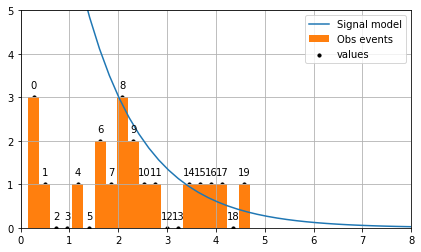

maximum area  6.21961751568864 is between 0.15241900908478712 and 0.37938965166748756


In [265]:
c1, c2 = 15, -0.8
plt.figure(figsize=(7,4))
plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
plt.hist(di, bins = 20, label = 'Obs events')
plt.scatter(binscenter,value, s=10, color ='black',label ='values')
plt.xlim(0,8); plt.ylim(0,5);plt.legend();plt.grid()
for i in range(20):
    plt.text(xbins[i]+0.12 , histvalue[i] + 0.2, str(i), fontsize=10, ha='center')
plt.show()

n = 1

maxgaps = []
for b in range(20):
    if b < len(histvalue) and histvalue[b] ==n:
#         print('#events = '+ str(n)+' at bin#: ', b, ', xvalue[bin]: ',xbins[b], ', histvalue[i]: ',histvalue[b])
        if  b !=0:
            for m in np.arange(1,10):
                if histvalue[b-m] ==0:
                    continue
                else: 
                    startbin = b-m+1
                    startx = xbins[startbin]
                    break
        else: 
            startbin = b
            start = xbins[b]
            
        for m in np.arange(1,10):
            if b+m < len(histvalue) and histvalue[b+m] ==0:
                continue
            else: 
                endbin = b+m
                endx = xbins[endbin]
                break            
        
        gaparea = np.trapz([signal_model(startx, c1, c2 ), signal_model(endx, c1, c2 )], [startx, endx])
#         print('x_i = ', gaparea)
        maxgaps.append((startx, endx , gaparea))
print('maximum area ', maxvalues[2], 'is between', xbins[int(maxvalues[0])], 'and', xbins[int(maxvalues[1])])

In [264]:
maxarray = np.asarray(maxgaps)
maxvalues = maxarray[:][np.argmax(maxarray[:,2])]
mu = 0
for b in range(20):
    mu+=np.trapz([signal_model(xbins[b], c1, c2 ), signal_model(xbins[b+1],c1, c2 )], [xbins[b], xbins[b+1]])
print('mu is', mu)
print('m is ', mu/maxvalues[2])
print('x is', maxvalues[2])
c0 = 0
for k in range(0, int(mu/maxvalues[2])+1):
    c0 +=c0_k(mu=mu, x = maxvalues[2], k=k)
print('C0', c0)

mu is 16.202545284481992
m is  2.6050710101725665
x is 6.21961751568864
C0 0.9781868512690647


### Finding optimum signal model / sigma and $C_0$ using optimum interval method

In [ ]:
for c1 in np.linspace(1,30,10):
    for c2 in np.linspace(-5,-0.5,10):

For constant c1 28.275862068965516  c2  -0.5
C0 is 0.9053608572868683
expected events / area under blue curve:  47.037129997580635


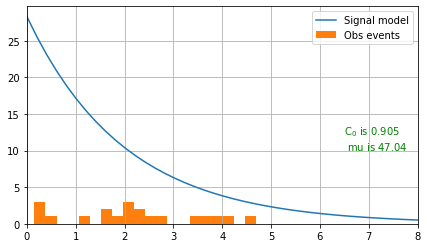

-------------------------------------
For constant c1 28.275862068965516  c2  -0.5
C0 is 0.9053608572868683
expected events / area under blue curve:  47.037129997580635


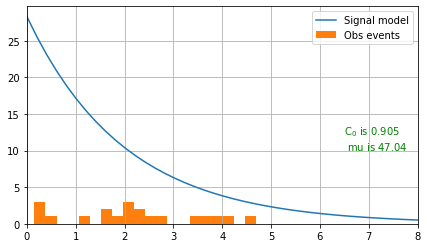

-------------------------------------
For constant c1 32.93103448275862  c2  -0.6206896551724137
C0 is 0.8931274298116068
expected events / area under blue curve:  45.45741438418551


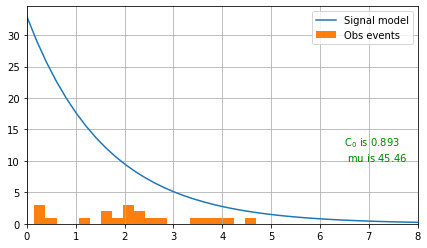

-------------------------------------
For constant c1 32.93103448275862  c2  -0.6206896551724137
C0 is 0.8931274298116068
expected events / area under blue curve:  45.45741438418551


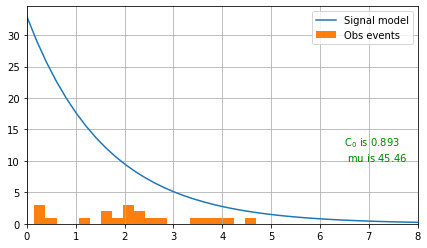

-------------------------------------
For constant c1 40.689655172413794  c2  -0.7413793103448274
C0 is 0.907938807663659
expected events / area under blue curve:  47.437547657802874


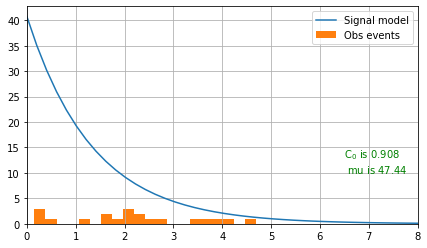

-------------------------------------
For constant c1 40.689655172413794  c2  -0.7413793103448274
C0 is 0.907938807663659
expected events / area under blue curve:  47.437547657802874


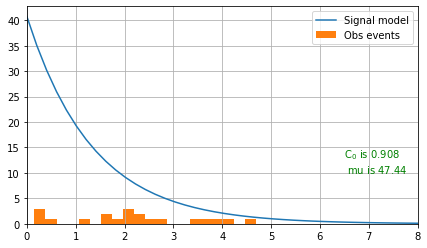

-------------------------------------
For constant c1 48.44827586206897  c2  -0.8620689655172411
C0 is 0.9039642667763556
expected events / area under blue curve:  48.449760849252144


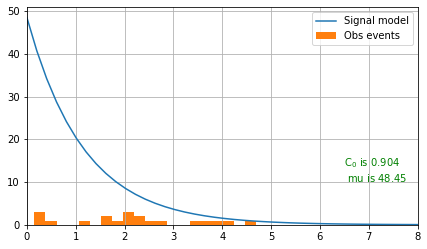

-------------------------------------
For constant c1 48.44827586206897  c2  -0.8620689655172411
C0 is 0.9039642667763556
expected events / area under blue curve:  48.449760849252144


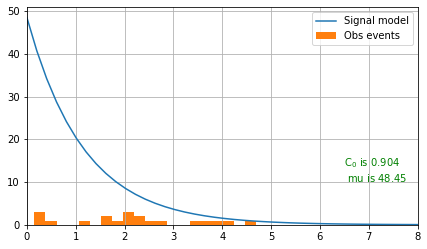

-------------------------------------


In [386]:
n = 2
c1_all, c2_all, mu_all, c0_all = [], [], [], []
for c1 in np.linspace(5,50,30):
    for c2 in np.linspace(-4,-0.5,30):
        maxgaps = []
        for b in range(20):
            if b < len(histvalue) and histvalue[b] ==n:
        #         print('#events = '+ str(n)+' at bin#: ', b, ', xvalue[bin]: ',xbins[b], ', histvalue[i]: ',histvalue[b])
                if  b !=0:
                    for m in np.arange(1,10):
                        if histvalue[b-m] ==0:
                            continue
                        else: 
                            startbin = b-m+1
                            startx = xbins[startbin]
                            break
                else: 
                    startbin = b
                    start = xbins[b]

                for m in np.arange(1,10):
                    if b+m < len(histvalue) and histvalue[b+m] ==0:
                        continue
                    else: 
                        endbin = b+m
                        endx = xbins[endbin]
                        break            

                gaparea = np.trapz([signal_model(startx, c1, c2 ), signal_model(endx, c1, c2 )], [startx, endx])
                maxgaps.append((startx, endx , gaparea))
                maxarray = np.asarray(maxgaps)
                maxvalues = maxarray[:][np.argmax(maxarray[:,2])]
                mu = 0
                for b in range(20):
                    mu+=np.trapz([signal_model(xbins[b], c1, c2 ), signal_model(xbins[b+1],c1, c2 )], [xbins[b], xbins[b+1]])

                c0 = 0
                for k in range(0, int(mu/maxvalues[2])+1):
                    c0 +=c0_k(mu=mu, x = maxvalues[2], k=k)
                c1_all.append(c1); c2_all.append(c2); mu_all.append(mu); c0_all.append(c0)
                    
                if c0 > 0.89 and c0 < 0.91:
                    print('For constant c1', c1, ' c2 ', c2)
                    print('C0 is', c0)
                    print('expected events / area under blue curve: ', mu)
                    plt.figure(figsize=(7,4))
                    x = np.linspace(0, 20, 100)
                    plt.plot(x, signal_model(x,c1, c2) , label = 'Signal model')
                    plt.hist(di, bins = 20, label = 'Obs events')
                    plt.text(6.5,10,'$\mathregular{C_0}$ is %.3f \n $\mathregular{mu}$ is %.2f'%(c0, mu), color ='green')
                    plt.xlim(0,8); plt.legend(); plt.grid()
                    plt.show()
                    print('-------------------------------------')

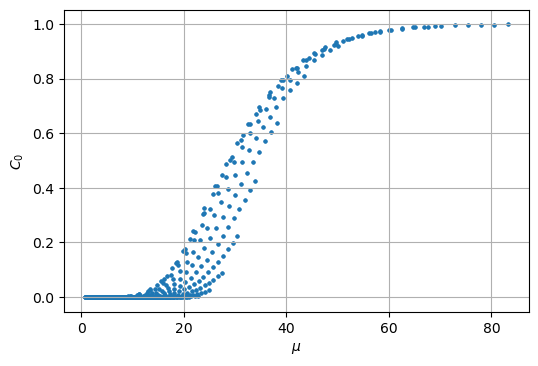

In [387]:
plt.figure(dpi=100)
plt.scatter(mu_all, c0_all, s=4)
plt.xlabel('$\mu$');plt.ylabel('$C_0$');plt.grid(); plt.show()

In [388]:
print('\tmu\t\t\tc1\t\t  c2')
for n in np.where(np.array(mu_all)>45)[0]:
    print(mu_all[n],'\t', c1_all[n],'\t', c2_all[n])

	mu			c1		  c2
47.037129997580635 	 28.275862068965516 	 -0.5
47.037129997580635 	 28.275862068965516 	 -0.5
49.61843591208202 	 29.82758620689655 	 -0.5
49.61843591208202 	 29.82758620689655 	 -0.5
52.199741826583406 	 31.379310344827587 	 -0.5
52.199741826583406 	 31.379310344827587 	 -0.5
45.45741438418551 	 32.93103448275862 	 -0.6206896551724137
45.45741438418551 	 32.93103448275862 	 -0.6206896551724137
54.78104774108477 	 32.93103448275862 	 -0.5
54.78104774108477 	 32.93103448275862 	 -0.5
47.59938678972305 	 34.48275862068965 	 -0.6206896551724137
47.59938678972305 	 34.48275862068965 	 -0.6206896551724137
57.36235365558614 	 34.48275862068965 	 -0.5
57.36235365558614 	 34.48275862068965 	 -0.5
49.74135919526057 	 36.03448275862069 	 -0.6206896551724137
49.74135919526057 	 36.03448275862069 	 -0.6206896551724137
59.94365957008752 	 36.03448275862069 	 -0.5
59.94365957008752 	 36.03448275862069 	 -0.5
51.883331600798115 	 37.58620689655172 	 -0.6206896551724137
51.8833316007981